# Spam Filtering Technique for Short Message Service
## EPFL - Adaptation and Learning (EE-621) 
## Adrien Besson and Dimitris Perdios

This notebook presents the data exploration step of the project described in Section I of the report.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
from wordcloud import WordCloud

We first load the dataset using Pandas.

In [2]:
# Load dataset
input_file = os.path.join(os.pardir, 'datasets', 'spam.csv')
data = pd.read_csv(input_file, encoding='latin-1', usecols=[0, 1])

### 1. General information on the dataset

In [3]:
# Rename the columns with more explicit names
data.rename(columns={'v1' : 'label', 'v2' : 'message'}, inplace=True)

# Five first rows of the dataset
data.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


We see that we have two columns, one with the label of the text message, e.g. *ham* or *spam*, and one with the content of the sms.

In [4]:
# Give a brief description of the dataset
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

### 2. Bar-plot of the most frequent words in the dataset

As a first step, we display an histogram of the most frequent words in the dataset.

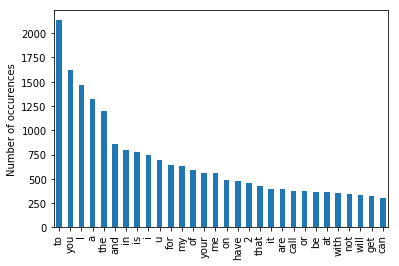

In [5]:
# Visualization of the most frequent words of the dataset
count1 = Counter(" ".join(data["message"]).split()).most_common(30)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words", 1 : "count"})
fig = plt.figure()
ax = fig.add_subplot(111)
df1.plot.bar(ax=ax, legend = False)
xticks = np.arange(len(df1["words"]))
ax.set_xticks(xticks)
ax.set_xticklabels(df1["words"])
ax.set_ylabel('Number of occurences')
plt.show()

### 3. Wordclouds 

In order to have words occurences in each class, we use wordclouds where most frequent words appear the biggest.

#### a. Spam class

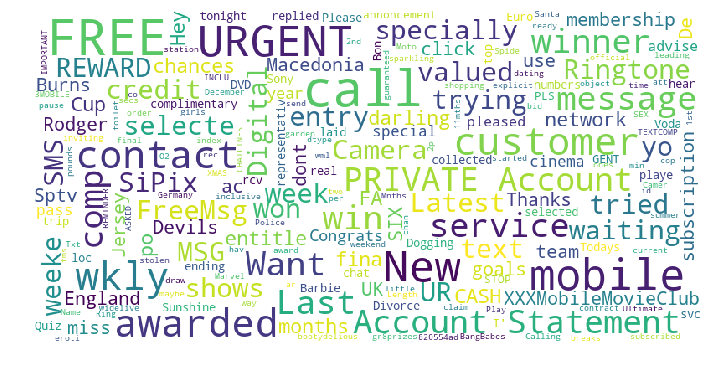

In [6]:
# Visualization of words in spam using word clouds
df_spam = data.loc[data['label'] == 'spam']

# Creating  the wordcloud
wordcloud = WordCloud(
                          height=400,
                          width=800,
                          background_color='white',
                          max_words=400,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(df_spam['message']))


# Display the wordcloud
fig = plt.figure(1, figsize=(12,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### b. Ham class

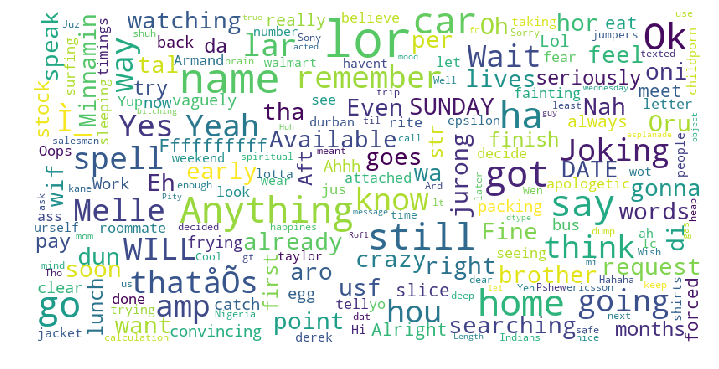

In [7]:
# Visualization of words in ham using word clouds
df_ham = data.loc[data['label'] == 'ham']

# Creating  the wordcloud
wordcloud = WordCloud(
                          height=400,
                          width=800,
                          background_color='white',
                          max_words=400,
                          max_font_size=60, 
                          random_state=42
                         ).generate(str(df_ham['message']))

# Display the wordcloud
fig = plt.figure(1, figsize=(12,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()